In [16]:
import numpy as np
import pandas as pd
from keras import Input, Model
import keras
import tensorflow as tf
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
from scipy.sparse import coo_matrix

In [2]:
# Relations / Edges / Arcs
raw_edges = pd.read_csv('data/edges.csv')
raw_edges.columns = ['u','v']

# Number of Nodes
N = max(raw_edges['u'].max(), raw_edges['v'].max()) + 1

# Number of Edges
M = len(raw_edges)

# Logs
print(N,M)

41773 125826


In [43]:
raw_edges[raw_edges['u']==2003]

,u,v
11973,2003,25252
11974,2003,33610
11975,2003,41133
11976,2003,27070
11977,2003,5327
...,...,...
12077,2003,28523
12078,2003,37253
12079,2003,36793
12080,2003,26318


In [42]:
A = coo_matrix((np.ones(M), (raw_edges['u'], raw_edges['v'])), shape=(N, N))
A.sum(1).argmax()

2003

In [3]:
# Train / Test
r = int(.8 * M)
train_edges = raw_edges[:r]
test_edges = raw_edges[r:]
print(len(train_edges), len(test_edges))

100660 25166


In [4]:
class ReduceSumLayer(keras.layers.Layer):
    def call(self, x):
        return tf.reduce_sum(x, -1)

In [5]:
# Input u. Got [None, 1].
input_u = Input(shape=(1,), name="input_u")

# Input v. Got [None, 1].
input_v = Input(shape=(1,), name="input_v")

# Embeddings Matrix. Got [N, k].
k = 4
z = keras.layers.Embedding(input_dim=N, output_dim=k)

# Embedded u. Got [None, 1, k].
zu = z(input_u)

# Reshape. Got [None, k].
zu = keras.layers.Reshape((4,))(zu)

# Embedded u. Got [None, 1, k].
zv = z(input_v)

# Reshape. Got [None, k].
zv = keras.layers.Reshape((4,))(zv)

# Got [None, k].
zuv = keras.layers.Multiply()([zu, zv])

# Got [None, 1].
suv = ReduceSumLayer()(zuv)

# Got [None, 1].
p_uv = keras.activations.sigmoid(suv)

# Model
m = Model(inputs=[input_u, input_v], outputs=p_uv)
mz = Model(inputs=input_u, outputs=zu)

In [6]:
# Compile
opt = keras.optimizers.Adam(learning_rate=1e-3)
loss = keras.losses.BinaryCrossentropy()
m.compile(optimizer=opt, loss=loss)

In [7]:
batch_train_u = np.matrix(train_edges['u']).T
batch_train_v = np.matrix(train_edges['v']).T
y_train_true = np.ones(len(train_edges))

# batch_train_u +=
# batch_train_v +=
# y_train_true += 00000000000000000

batch_test_u = np.matrix(test_edges['u']).T
batch_test_v = np.matrix(test_edges['v']).T
y_test_true = np.ones(len(test_edges))

# batch_test_u +=
# batch_test_v +=
# y_test_true += 00000000000000000

In [8]:
# Fit
m.fit(x=[batch_train_u, batch_train_v], y=y_train_true, batch_size=163072, epochs=256)

Epoch 1/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - loss: 0.6932
Epoch 2/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6931
Epoch 3/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6931
Epoch 4/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6931
Epoch 5/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.6931
Epoch 6/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.6931
Epoch 7/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.6931
Epoch 8/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6931
Epoch 9/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.6931
Epoch 10/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6931
Epoch 11/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.6931
Epoch 12/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6930
Epoch 13/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.6930
Epoch 14/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.6930
Epoch 15/256
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6930
Epoch 16/256
1/1 ━

In [9]:
y_pred_train = m.predict([batch_train_u, batch_train_v], batch_size=163072)
y_pred_test = m.predict([batch_test_u, batch_test_v], batch_size=163072)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


In [44]:
m.predict([np.array([[2003]]), np.array([[5327]])], batch_size=163072)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([0.8138239], dtype=float32)

In [49]:
m.predict([np.array([[2003]]), np.array([[0]])], batch_size=163072)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([0.6739581], dtype=float32)

In [10]:
print(precision_score(y_true=y_train_true, y_pred=y_pred_train.round()))
print(recall_score(y_true=y_train_true, y_pred=y_pred_train.round()))

1.0
0.9624677130935824


In [11]:
print(precision_score(y_true=y_test_true, y_pred=y_pred_test.round()))
print(recall_score(y_true=y_test_true, y_pred=y_pred_test.round()))

1.0
0.7004688865930223


In [12]:
pd.Series(y_pred_test.round()).value_counts()

1.0    17628
0.0     7538
Name: count, dtype: int64

In [46]:
z_np = mz.predict(np.matrix(range(N)).T, batch_size=163072)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


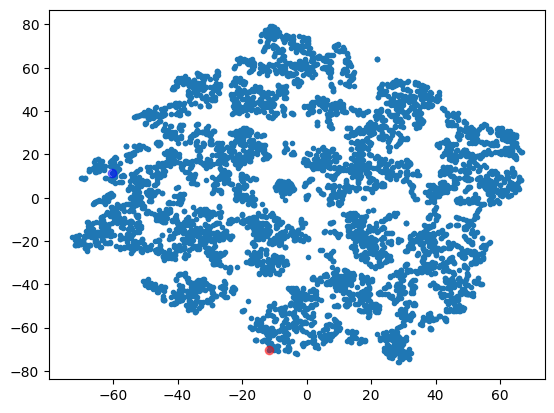

In [48]:
# Embeddings Vizualisation
z_np_ = TSNE(n_components=2).fit_transform(z_np[:6000])


In [ ]:
plt.plot(z_np_[:,0], z_np_[:, 1], '.')
plt.plot(z_np_[2003,0], z_np_[2003, 1], 'o', color='red', alpha=0.5)
plt.plot(z_np_[5327,0], z_np_[5327, 1], 'o', color='blue', alpha=0.5)